<a href="https://colab.research.google.com/github/easydong02/Year-Dream/blob/main/EDA_cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 공공데이터를 이용한 카페 상권분석(2022 Ver.)


**들어가며**

- 공공데이터를 통해 대한민국을 이해해봅시다(?).
- 공공데이터포털(data.go.kr)에 다양한 데이터가 공개되어 있습니다.
- 그 중에 카페(라는 업종분류)들에 대해서 현황을 조사하려고 합니다.

**명세사항**
1. 전국 카페 데이터를 모두 수집해야합니다.
2. 지역별 or 브랜드별 점포 현황을 확인합니다.
3. 분석 결과를 시각화합니다. 

## 0. Data Description

- 소상공인 상권 데이터를 국내에 있는 모든 소상공인으로 등록된 점포들에 대한 정보를 제공합니다.

[데이터] https://www.data.go.kr/data/15083033/fileData.do

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
import os

### 1. 데이터 불러오기

In [5]:
# 다운로드 받은 데이터중 일부를 열어봅니다.
base_path="/content/drive/MyDrive/Colab Notebooks/data/소상공인/"
seoul = pd.read_csv(base_path+ "소상공인시장진흥공단_상가(상권)정보_서울_202112.csv")
seoul

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315289,17915026,사라헤어하우스,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,...,1162010100108610014026971,NaN,서울특별시 관악구 관악로 185,151811,8758.0,NaN,3,NaN,126.952644,37.481784
315290,17917525,김현진153필라테스,NaN,N,관광/여가/오락,N05,요가/단전/마사지,N05A01,요가/단식,S96129,...,1174010900100510007009699,남해빌딩,서울특별시 강동구 양재대로 1517,134862,5316.0,NaN,1,NaN,127.140855,37.541259
315291,17913544,26도헤어마곡나루역점,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,...,1150010500107590001000001,두산더랜드타워,서울특별시 강서구 마곡서로 152,157805,7788.0,306,NaN,NaN,126.825623,37.567747
315292,17958597,명품케터링,NaN,Q,음식,Q13,음식배달서비스,Q13A03,음식출장조달,I56131,...,1130510100113570000035071,삼각산아이원아파트,서울특별시 강북구 삼양로19길 113,142718,1198.0,120,NaN,NaN,127.017829,37.617041


In [12]:
# data 폴더에 있는 모든 csv 파일을 읽어오기 위해 glob을 사용합니다.
file_names = glob(base_path+"*.csv") # csv 확장를 가지는 모든 파일 이름.

# csv 목록 불러오기
total_df = pd.DataFrame()

# 모든 csv 병합하기
for file_name in file_names:
    temp_df = pd.read_csv(file_name)
    total_df=pd.concat([total_df,temp_df])
# reset index
total_df = total_df.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# 합친 것 저장
total_df.to_csv("/content/drive/MyDrive/Colab Notebooks/data/소상공인/total.csv", index=False)

In [19]:
# 분석에 필요한 column을 고릅니다. ## 자유롭게 하셔도 상관없습니다.
total_df.상권업종중분류명.unique() # 커피점/카페  #상호명 #시도명 

array(['자동차/이륜차', '기타판매업', '학원-보습교습입시', '한식', '유흥주점', '커피점/카페', '가구소매',
       '이/미용/건강', '선물/팬시/기념품', '종합소매점', '주택수리', '학원-음악미술무용', '가전제품소매',
       '패스트푸드', '가정/주방/인테리어', '닭/오리요리', '의복의류', '책/서적/도서', '철물/난방/건설자재소매',
       '주유소/충전소', '요가/단전/마사지', '분식', '화장품소매', '제과제빵떡케익', '사무/문구/컴퓨터',
       '무도/유흥/가무', '일식/수산물', '양식', '부동산중개', '운동/경기용품소매', '사진/광학/정밀기기소매',
       '의약/의료품소매', '가방/신발/액세서리', '음/식료품소매', '실내운동시설', '자동차/자동차용품',
       '세탁/가사서비스', 'PC/오락/당구/볼링등', '운송/배달/택배', '유아교육', '모텔/여관/여인숙',
       '기타음식업', '건강/미용식품', '대행업', '학원기타', '학원-예능취미체육', '기타서비스업',
       '중고품소매/교환', '페인트/유리제품소매', '중식', '실외운동시설', '사진', '취미/오락관련소매',
       '학원-어학', '장례/묘지', '개인/가정용품수리', '캠프/별장/펜션', '광고/인쇄', '별식/퓨전요리',
       '인력/고용/용역알선', '음식배달서비스', '학원-창업취업취미', '학원-컴퓨터', '민박/하숙', '행사/이벤트',
       '대중목욕탕/휴게', '호텔/콘도', '유아용품', '법무세무회계', '시계/귀금속소매', '분양',
       '애견/애완/동물', '예술품/골동품/수석/분재', '물품기기대여', '학문교육기타', '개인서비스',
       '도서관/독서실', '놀이/여가/취미', '부페', '예식/의례/관혼상제', '종교용품판매', '학원-자격/국가고시',
       '운영관리시설', '연극/영화/

In [21]:
# 메모리 낭비를 막기 위해 필요없는 변수는 제거합니다.
total_df = total_df[['상권업종중분류명','상호명','시도명']]

### 2. 데이터 구경하기

In [22]:
total_df

,상권업종중분류명,상호명,시도명
0,자동차/이륜차,스피드메이트,대전광역시
1,기타판매업,국제종합기계부품총판,대전광역시
2,학원-보습교습입시,알파수학전문학원,대전광역시
3,한식,솔바람,대전광역시
4,유흥주점,BBQ치킨,대전광역시
...,...,...,...
2190343,종합소매점,별난동네슈퍼25,광주광역시
2190344,종합소매점,비쥬잡화,광주광역시
2190345,부동산중개,클로버개발상사,광주광역시
2190346,가구소매,디엠가구,광주광역시


#### 전국 커피 전문점 

In [24]:
# 카페만 뽑아냅니다.
df_coffee = total_df[total_df['상권업종중분류명']=='커피점/카페'].reset_index(drop=True)
# index를 다시 세팅합니다.

print("전국 커피 전문점 점포 수 : ", len(df_coffee))
df_coffee.head()

전국 커피 전문점 점포 수 :  101346


,상권업종중분류명,상호명,시도명
0,커피점/카페,커피기념일,대전광역시
1,커피점/카페,엽짚,대전광역시
2,커피점/카페,에이치앤디이더블드림스,대전광역시
3,커피점/카페,민들레홀씨,대전광역시
4,커피점/카페,은진다방,대전광역시


#### 서울내 커피 전문점 

In [25]:
# 카페 중에 "서울"에 위치하고 있는 점포만 뽑아냅니다.
df_seoul_coffee = df_coffee.loc[df_coffee.시도명 == "서울특별시", :]
df_seoul_coffee.index = range(len(df_seoul_coffee)) #reset_index와 같은 효과
print('서울시 내 커피 전문점 점포 수 :', len(df_seoul_coffee))
df_seoul_coffee.head()

서울시 내 커피 전문점 점포 수 : 18628


,상권업종중분류명,상호명,시도명
0,커피점/카페,커피빈,서울특별시
1,커피점/카페,요거프레소,서울특별시
2,커피점/카페,우성커피숍,서울특별시
3,커피점/카페,버블베어,서울특별시
4,커피점/카페,알뤼르,서울특별시


In [41]:
df_starbucks= df_seoul_coffee[df_seoul_coffee['상호명'].str.contains("스타벅스")]

In [33]:
df_starbucks.reset_index(drop=True,inplace=True)

In [48]:
df_starbucks = df_coffee[df_coffee['상호명'].str.contains("스타벅스")]
df_starbucks

,상권업종중분류명,상호명,시도명
34,커피점/카페,스타벅스,대전광역시
80,커피점/카페,스타벅스,대전광역시
86,커피점/카페,스타벅스,대전광역시
154,커피점/카페,스타벅스,대전광역시
162,커피점/카페,스타벅스,대전광역시
...,...,...,...
100563,커피점/카페,스타벅스,광주광역시
100594,커피점/카페,스타벅스,광주광역시
100776,커피점/카페,스타벅스,광주광역시
101025,커피점/카페,스타벅스,광주광역시


In [42]:
df_starbucks_seoul

,상권업종중분류명,상호명,시도명
0,커피점/카페,스타벅스,서울특별시
1,커피점/카페,스타벅스남부터미널2점,서울특별시
2,커피점/카페,스타벅스,서울특별시
3,커피점/카페,스타벅스미아사거리역점,서울특별시
4,커피점/카페,스타벅스,서울특별시
...,...,...,...
462,커피점/카페,스타벅스,서울특별시
463,커피점/카페,스타벅스,서울특별시
464,커피점/카페,스타벅스,서울특별시
465,커피점/카페,스타벅스,서울특별시


#### 전국 스타벅스

In [ ]:
# 이번엔 전국에 있는 스타벅스를 뽑아냅니다.
df_starbucks = 
df_starbucks.index = range(len(df_starbucks))
print('전국 스타벅스 점포 수 :', len(df_starbucks))
df_starbucks.head()

#### 서울 스타벅스

In [ ]:
# 이번엔 서울에 있는 스타벅스를 뽑아냅니다.
df_seoul_starbucks = 
df_seoul_starbucks.index = range(len(df_seoul_starbucks))
print('서울시 내 스타벅스 점포 수 :', len(df_seoul_starbucks))
df_seoul_starbucks.head()

#### 전국 이디야

In [36]:
df_ediya = df_coffee[df_coffee['상호명'].str.contains("이디야")]
df_ediya

,상권업종중분류명,상호명,시도명
165,커피점/카페,이디야커피,대전광역시
199,커피점/카페,이디야커피,대전광역시
287,커피점/카페,이디야커피,대전광역시
331,커피점/카페,이디야커피,대전광역시
426,커피점/카페,이디야커피,대전광역시
...,...,...,...
101027,커피점/카페,이디야커피,광주광역시
101146,커피점/카페,이디야커피,광주광역시
101224,커피점/카페,이디야커피,광주광역시
101231,커피점/카페,이디야커피,광주광역시


#### 서울 이디야

In [37]:
df_ediya_seoul= df_ediya[df_ediya["시도명"]=="서울특별시"]
df_ediya_seoul

,상권업종중분류명,상호명,시도명
11443,커피점/카페,이디야커피,서울특별시
11457,커피점/카페,이디야커피,서울특별시
11483,커피점/카페,이디야커피양재AT점,서울특별시
11485,커피점/카페,이디야커피,서울특별시
11553,커피점/카페,이디야커피,서울특별시
...,...,...,...
29311,커피점/카페,이디야커피,서울특별시
29378,커피점/카페,이디야커피,서울특별시
29390,커피점/카페,이디야커피,서울특별시
29417,커피점/카페,이디야커피,서울특별시


#### 전국 투썸 

In [38]:
df_twosome= df_coffee[df_coffee['상호명'].str.contains("투썸")]
df_twosome

,상권업종중분류명,상호명,시도명
9,커피점/카페,투썸커피한타연구소점,대전광역시
123,커피점/카페,투썸플레이스,대전광역시
149,커피점/카페,투썸플레이스,대전광역시
160,커피점/카페,투썸플레이스,대전광역시
167,커피점/카페,투썸플레이스씨지브이대전터미,대전광역시
...,...,...,...
100886,커피점/카페,투썸플레이스,광주광역시
100993,커피점/카페,투썸플레이스,광주광역시
101138,커피점/카페,투썸플레이스,광주광역시
101298,커피점/카페,투썸플레이스,광주광역시


#### 서울 투썸 

In [39]:
df_twosome_seoul= df_twosome[df_twosome['시도명']=='서울특별시']
df_twosome_seoul

,상권업종중분류명,상호명,시도명
11546,커피점/카페,투썸플레이스서울대역중앙점,서울특별시
11588,커피점/카페,투썸플레이스,서울특별시
11604,커피점/카페,투썸플레이스,서울특별시
11619,커피점/카페,투썸플레이스,서울특별시
11674,커피점/카페,투썸플레이스,서울특별시
...,...,...,...
27921,커피점/카페,투썸플레이스,서울특별시
27935,커피점/카페,투썸플레이스,서울특별시
28163,커피점/카페,투썸플레이스,서울특별시
28633,커피점/카페,투썸플레이스,서울특별시


### 3. 커피전문점 별 비율 비교하기 (주요 브랜드 위주로)

**변수**

- 전체 점포 : data
- 전체/서울 커피전문점 : df_coffee / df_seoul_starbucks



- 전체/서울 스타벅스 : df_starbucks / df_seoul_starbucks
- 전체/서울 이디야 : df_ediya / df_seoul_ediya
- 전체/서울 투썸플레이스 : df_2some / df_seoul_2some
- 전체/서울 빽다방 : df_bbaek / df_seoul_bbaek

#### 전체 커피전문점 내 주요 커피브랜드 입점 비율 

In [49]:
print("**** 전국 커피전문점중 주요 3대 커피브랜드 입점 비율 ****")

major_cafe_rate= (len(df_starbucks)+len(df_ediya)+len(df_twosome)) / len(df_coffee)

print("%.2f%%" % (major_cafe_rate*100))

**** 전국 커피전문점중 주요 3대 커피브랜드 입점 비율 ****
4.54%


#### 서울 커피전문점 내 주요 커피브랜드 입점 비율 

In [52]:
print("스타벅스 : %.3f%%" % (len(df_starbucks_seoul)/ len(df_seoul_coffee)*100))
print("이디야 : %.3f%%" % (len(df_ediya_seoul)/ len(df_seoul_coffee)*100))
print("투썸플레이스 : %.3f%%" % (len(df_twosome_seoul)/ len(df_seoul_coffee)*100))

스타벅스 : 2.507%
이디야 : 2.212%
투썸플레이스 : 1.294%


#### 각 커피브랜드별 서울 입점 비율 

In [53]:
print("**** 주요 커피브랜드별 서울 입점 비율 ****")

print("스타벅스 : %.3f%%" % (len(df_starbucks_seoul)/ len(df_starbucks)*100))
print("이디야 : %.3f%%" % (len(df_ediya_seoul)/ len(df_ediya)*100))
print("투썸플레이스 : %.3f%%" % (len(df_twosome_seoul)/ len(df_twosome)*100))

**** 주요 커피브랜드별 서울 입점 비율 ****
스타벅스 : 31.071%
이디야 : 19.952%
투썸플레이스 : 23.218%


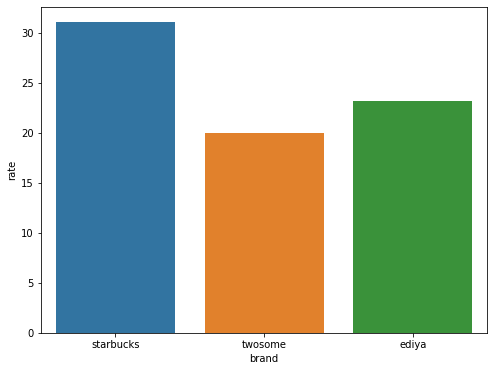

In [57]:
# 주요 3대 커피브랜드 서울 입점 비율을 시각화합니다.
top3_cafe= pd.DataFrame({'brand':['starbucks','twosome',"ediya"],
                         'rate':[31.071,19.952,23.218]})

plt.figure(figsize=(8,6))
sns.barplot(data=top3_cafe, x='brand',y= 'rate')
plt.show()